## Important Libraries


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.applications import *

## Extracting Zipfile in colab

In [ ]:
file = zipfile.ZipFile("/content/drive/MyDrive/Colab Notebooks/Tensorflow Projects/Image Classification Project/Butterfly Classification/Butterfly_images.zip", "r")
file.extractall()
file.close()

## Going through the directories

In [ ]:
import os

In [ ]:
for dirpath, dirnames, filenames in os.walk("/content/train"):
  print(f"There are {len(filenames)} files and {len(dirnames)} in {dirpath}")

There are 0 files and 75 in /content/train
There are 116 files and 0 in /content/train/BECKERS WHITE
There are 136 files and 0 in /content/train/IPHICLUS SISTER
There are 118 files and 0 in /content/train/CAIRNS BIRDWING
There are 107 files and 0 in /content/train/AFRICAN GIANT SWALLOWTAIL
There are 116 files and 0 in /content/train/LARGE MARBLE
There are 107 files and 0 in /content/train/YELLOW SWALLOW TAIL
There are 129 files and 0 in /content/train/MONARCH
There are 108 files and 0 in /content/train/METALMARK
There are 133 files and 0 in /content/train/EASTERN COMA
There are 115 files and 0 in /content/train/INDRA SWALLOW
There are 125 files and 0 in /content/train/ORANGE OAKLEAF
There are 112 files and 0 in /content/train/PAINTED LADY
There are 187 files and 0 in /content/train/MOURNING CLOAK
There are 122 files and 0 in /content/train/CHESTNUT
There are 109 files and 0 in /content/train/ORCHARD SWALLOW
There are 120 files and 0 in /content/train/PIPEVINE SWALLOW
There are 132 file

### Getting Class Names

In [ ]:
import pathlib

In [ ]:
path = pathlib.Path("train")
class_names = []
for i in path.glob("*"):
  class_names.append(i.name)

In [ ]:
class_names[:10]

['BECKERS WHITE',
 'IPHICLUS SISTER',
 'CAIRNS BIRDWING',
 'AFRICAN GIANT SWALLOWTAIL',
 'LARGE MARBLE',
 'YELLOW SWALLOW TAIL',
 'MONARCH',
 'METALMARK',
 'EASTERN COMA',
 'INDRA SWALLOW']

## Going through the dataset(displaying random image)

In [ ]:
import matplotlib.image as mpimg
import random

In [ ]:
def random_image(base_folder, target_folder):

  target_file = base_folder + target_folder
  random_img = random.sample(os.listdir(target_file), 1)

  img = mpimg.imread(target_file + "/" + random_img[0])
  plt.imshow(img)

  plt.title(target_folder)

  plt.axis(False)

  print(f"Image Shape : {img.shape}") 

Image Shape : (224, 224, 3)
Image Shape : (224, 224, 3)
Image Shape : (224, 224, 3)
Image Shape : (224, 224, 3)
Image Shape : (224, 224, 3)
Image Shape : (224, 224, 3)
Image Shape : (224, 224, 3)
Image Shape : (224, 224, 3)
Image Shape : (224, 224, 3)


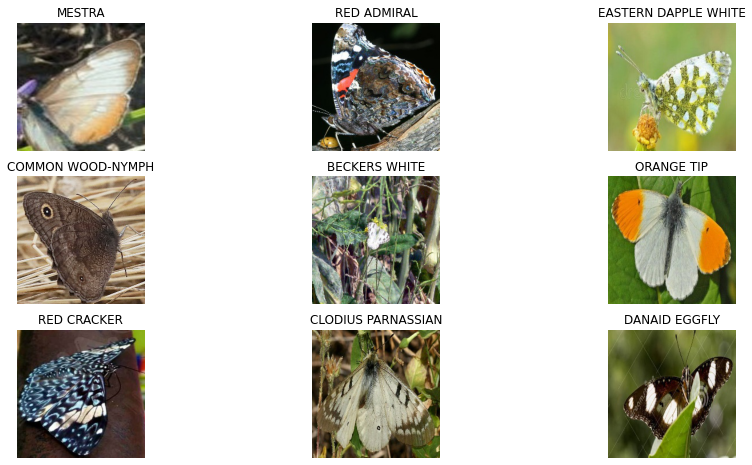

In [ ]:
plt.figure(figsize = (15, 8))
for i in range(1, 10):
  plt.subplot(3, 3, i)
  random_image(base_folder = "/content/train/", target_folder = random.choice(class_names))

# Preprocessing the dataset 

### Image Generator

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_path = "/content/train/"
valid_path = "/content/valid/"

In [ ]:
tf.random.set_seed(10)
train_datagen = ImageDataGenerator(rescale = 1./255.)
valid_datagen = ImageDataGenerator(rescale = 1./255.)

In [ ]:
train_data = train_datagen.flow_from_directory(directory = train_path, 
                                               batch_size = 32,
                                               target_size = (224, 224), 
                                               class_mode = "categorical", 
                                               shuffle = True, 
                                               seed = 42
                                               )

validation_data = valid_datagen.flow_from_directory(directory = valid_path, 
                                               batch_size = 32,
                                               target_size = (224, 224), 
                                               class_mode = "categorical", 
                                               shuffle = True, 
                                               seed = 42
                                               )


Found 9285 images belonging to 75 classes.
Found 375 images belonging to 75 classes.


# Model Creation

### Model_1: Simple Model

In [ ]:
model_1 = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(input_shape = (224, 224, 3), filters = 10, kernel_size = 3, activation = "relu"), 
    
    tf.keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = 2, padding = "valid"),
    tf.keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = "relu"),
    tf.keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = "relu"),
    tf.keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = "relu"),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(len(class_names), activation = "softmax")
                                        
                                    ])



In [ ]:
model_1.compile(loss = ["categorical_crossentropy"], 
                optimizer = tf.keras.optimizers.Adam(), 
                metrics = ["accuracy"])

In [ ]:
# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=validation_data,
                        validation_steps=len(validation_data))

Epoch 1/10
291/291 [==============================] - 31s 76ms/step - loss: 3.1881 - accuracy: 0.2334 - val_loss: 2.0951 - val_accuracy: 0.4853
Epoch 2/10
291/291 [==============================] - 22s 75ms/step - loss: 0.9469 - accuracy: 0.7492 - val_loss: 2.2537 - val_accuracy: 0.5120
Epoch 3/10
291/291 [==============================] - 21s 74ms/step - loss: 0.0831 - accuracy: 0.9785 - val_loss: 3.4139 - val_accuracy: 0.4693
Epoch 4/10
291/291 [==============================] - 22s 74ms/step - loss: 0.0129 - accuracy: 0.9969 - val_loss: 3.2403 - val_accuracy: 0.4747
Epoch 5/10
291/291 [==============================] - 22s 74ms/step - loss: 0.0067 - accuracy: 0.9988 - val_loss: 3.6791 - val_accuracy: 0.4747
Epoch 6/10
291/291 [==============================] - 21s 74ms/step - loss: 0.0192 - accuracy: 0.9954 - val_loss: 3.7570 - val_accuracy: 0.4480
Epoch 7/10
291/291 [==============================] - 21s 74ms/step - loss: 0.0181 - accuracy: 0.9962 - val_loss: 4.3138 - val_accuracy:

### Model_2: Larger Model

In [ ]:
def createModel():
    model = Sequential()
    model.add(Conv2D(32, (3,3), padding= 'same', activation='relu',
                    input_shape = (224,224,3)))
    model.add(Conv2D(32, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(75, activation="softmax"))
    
    return model

model_2 = createModel()
batch_size = 256
epochs = 10
model_2.compile(optimizer='adam', loss='categorical_crossentropy',
             metrics = ['accuracy'])
    

In [ ]:
history = model_2.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=validation_data,
                        validation_steps=len(validation_data))

Epoch 1/10
291/291 [==============================] - 42s 134ms/step - loss: 4.0266 - accuracy: 0.0652 - val_loss: 3.4683 - val_accuracy: 0.1573
Epoch 2/10
291/291 [==============================] - 38s 129ms/step - loss: 3.1215 - accuracy: 0.2234 - val_loss: 2.6039 - val_accuracy: 0.3360
Epoch 3/10
291/291 [==============================] - 38s 130ms/step - loss: 2.2577 - accuracy: 0.4083 - val_loss: 2.0879 - val_accuracy: 0.4667
Epoch 4/10
291/291 [==============================] - 38s 130ms/step - loss: 1.5494 - accuracy: 0.5843 - val_loss: 1.8094 - val_accuracy: 0.5120
Epoch 5/10
291/291 [==============================] - 38s 131ms/step - loss: 1.0218 - accuracy: 0.7095 - val_loss: 1.9044 - val_accuracy: 0.5147
Epoch 6/10
291/291 [==============================] - 38s 130ms/step - loss: 0.6756 - accuracy: 0.8069 - val_loss: 1.9230 - val_accuracy: 0.5360
Epoch 7/10
291/291 [==============================] - 38s 130ms/step - loss: 0.5256 - accuracy: 0.8477 - val_loss: 1.9593 - val_ac

### Model_3: Includes VGG, EfficientNet, Resnets etc

In [ ]:
def model_given(model_gave):
  '''
  model_gave: Represents any keras.applications model networks
  This Class represents the usage of the different network models without augumentation layer
  
  '''

  base_model = model_gave(input_shape = (224, 224, 3), pooling = "avg", include_top = False)
  base_model.trainable = False
  inputs = base_model.input
  # print(f"Input: {x}")
  x = Dense(400, activation = "relu")(base_model.output)
  # print(f"Output: {x}")
  x = Dense(400, activation = "relu")(x)
  outputs = Dense(75, activation="softmax", name="output_layer")(x)
  model = Model(inputs, outputs)

  return model


In [ ]:
vgg_model = model_given(model_gave = VGG16)
vgg_model.compile(optimizer='adam', loss='categorical_crossentropy',
             metrics = ['accuracy'])
vgg_history = vgg_model.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=validation_data,
                        validation_steps=len(validation_data))

58889256/58889256 [==============================] - 1s 0us/step
Epoch 1/10
291/291 [==============================] - 57s 182ms/step - loss: 2.9294 - accuracy: 0.2901 - val_loss: 1.5890 - val_accuracy: 0.5760
Epoch 2/10
291/291 [==============================] - 49s 170ms/step - loss: 1.3192 - accuracy: 0.6319 - val_loss: 1.0021 - val_accuracy: 0.7120
Epoch 3/10
291/291 [==============================] - 50s 171ms/step - loss: 0.9448 - accuracy: 0.7329 - val_loss: 0.7488 - val_accuracy: 0.7893
Epoch 4/10
291/291 [==============================] - 49s 170ms/step - loss: 0.7776 - accuracy: 0.7751 - val_loss: 0.7194 - val_accuracy: 0.7893
Epoch 5/10
291/291 [==============================] - 50s 170ms/step - loss: 0.6614 - accuracy: 0.8082 - val_loss: 0.5381 - val_accuracy: 0.8667
Epoch 6/10
291/291 [==============================] - 49s 170ms/step - loss: 0.5838 - accuracy: 0.8306 - val_loss: 0.5500 - val_accuracy: 0.8267
Epoch 7/10
291/291 [==============================] - 50s 170ms/s

### Model_4: Replacing Dense instead of the Conv2D

In [ ]:
def createDenseModel():
    model = Sequential()
    model.add(Dense(32, activation='relu',
                    input_shape = (224,224,3)))
    model.add(Dense(32, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(75, activation="softmax"))
    
    return model

dense_model = createDenseModel()
batch_size = 256
epochs = 10
dense_model.compile(optimizer='adam', loss='categorical_crossentropy',
             metrics = ['accuracy'])
    

In [ ]:
dense_model_history = dense_model.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=validation_data,
                        validation_steps=len(validation_data))

Epoch 1/10
291/291 [==============================] - 25s 84ms/step - loss: 3.9091 - accuracy: 0.0704 - val_loss: 3.3989 - val_accuracy: 0.2240
Epoch 2/10
291/291 [==============================] - 24s 84ms/step - loss: 2.8827 - accuracy: 0.2609 - val_loss: 2.5598 - val_accuracy: 0.4000
Epoch 3/10
291/291 [==============================] - 24s 83ms/step - loss: 2.3956 - accuracy: 0.3626 - val_loss: 2.2953 - val_accuracy: 0.4587
Epoch 4/10
291/291 [==============================] - 24s 83ms/step - loss: 2.0752 - accuracy: 0.4269 - val_loss: 2.0104 - val_accuracy: 0.4853
Epoch 5/10
291/291 [==============================] - 26s 88ms/step - loss: 1.8447 - accuracy: 0.4870 - val_loss: 1.7902 - val_accuracy: 0.5707
Epoch 6/10
291/291 [==============================] - 24s 83ms/step - loss: 1.6594 - accuracy: 0.5315 - val_loss: 1.8341 - val_accuracy: 0.5307
Epoch 7/10
291/291 [==============================] - 24s 83ms/step - loss: 1.4856 - accuracy: 0.5766 - val_loss: 1.6411 - val_accuracy:

### Model_5: This class is created with proper steps

#### Prefetching the data

In [ ]:
# It will work when you use image_dataset_from_directory

# train_data = train_data.prefetch(tf.data.AUTOTUNE)
# validation_data = validation_data.prefetch(tf.data.AUTOTUNE)

#### Model_5 class

In [ ]:
tf.random.set_seed(10)

In [ ]:
input_shape = (224, 224) + (3,)

base_model = VGG16(input_shape = input_shape, 
                            include_top = False, 
                            weights = "imagenet")

base_model.trainable = False

inputs = Input(shape = input_shape, name = "input_layer")

x = base_model(inputs, training = False)

x = GlobalAveragePooling2D(name = "pooling_layer")(x)

x = Dropout(0.2)(x)

x = Dense(400, activation = "relu")(x)

outputs = Dense(len(class_names), activation = "softmax", name = "output_layer")(x)

model_5 = Model(inputs, outputs)



In [ ]:
model_5.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 pooling_layer (GlobalAverag  (None, 512)              0         
 ePooling2D)                                                     
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 400)               205200    
                                                                 
 output_layer (Dense)        (None, 75)                30075     
                                                           

In [ ]:
model_5.compile(loss= "categorical_crossentropy", 
                optimizer = "adam", 
                metrics = ["accuracy"])

In [ ]:
history_5 = model_5.fit(train_data, 
                        epochs = 10,
                        steps_per_epoch = len(train_data), 
                        validation_data = validation_data, 
                        validation_steps = len(validation_data))


Epoch 1/10
291/291 [==============================] - 51s 171ms/step - loss: 3.3963 - accuracy: 0.2403 - val_loss: 2.1542 - val_accuracy: 0.5093
Epoch 2/10
291/291 [==============================] - 50s 171ms/step - loss: 1.8154 - accuracy: 0.5592 - val_loss: 1.2774 - val_accuracy: 0.6987
Epoch 3/10
291/291 [==============================] - 50s 170ms/step - loss: 1.3611 - accuracy: 0.6450 - val_loss: 0.9545 - val_accuracy: 0.7760
Epoch 4/10
291/291 [==============================] - 50s 171ms/step - loss: 1.1147 - accuracy: 0.7015 - val_loss: 0.7781 - val_accuracy: 0.8053
Epoch 5/10
291/291 [==============================] - 50s 170ms/step - loss: 0.9917 - accuracy: 0.7359 - val_loss: 0.6683 - val_accuracy: 0.8480
Epoch 6/10
291/291 [==============================] - 49s 170ms/step - loss: 0.8931 - accuracy: 0.7583 - val_loss: 0.6328 - val_accuracy: 0.8427
Epoch 7/10
291/291 [==============================] - 49s 170ms/step - loss: 0.8259 - accuracy: 0.7714 - val_loss: 0.5353 - val_ac

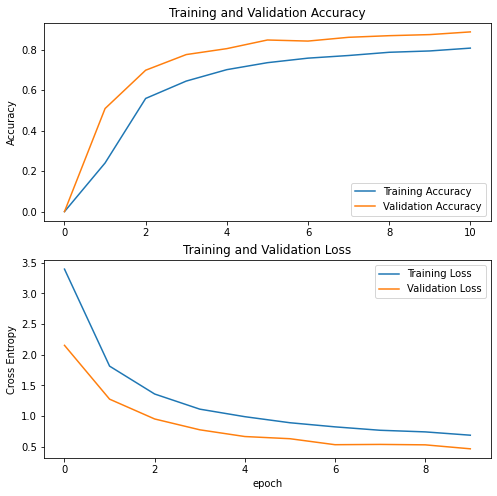

In [ ]:
acc = [0.] + history_5.history['accuracy']
val_acc = [0.] + history_5.history['val_accuracy']

loss = history_5.history['loss']
val_loss = history_5.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

## Fine Tuning

In [ ]:
for layer in model_5.layers:
  print(layer.trainable)

True
False
True
True
True
True


In [ ]:
base_model.trainable = True

# Freeze all layers except for the
for layer in base_model.layers[:-10]:
  layer.trainable = False



In [ ]:
model_6 = fine_tuning(network_model= VGG16)
model_6.summary()
initial_epochs = 10

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 pooling_layer (GlobalAverag  (None, 512)              0         
 ePooling2D)                                                     
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 400)               205200    
                                                                 
 output_layer (Dense)        (None, 75)                30075     
                                                           

In [ ]:
model_6.compile(loss= "categorical_crossentropy", 
                optimizer = "adam", 
                metrics = ["accuracy"])

In [ ]:
fine_tune_epochs = initial_epochs + 5

history_6 = model_5.fit(train_data, 
                        epochs = fine_tune_epochs,
                        steps_per_epoch = len(train_data),
                        initial_epoch = history_5.epoch[-1], 
                        validation_data = validation_data, 
                        validation_steps = len(validation_data))


Epoch 10/15
291/291 [==============================] - 50s 173ms/step - loss: 0.6646 - accuracy: 0.8115 - val_loss: 0.4488 - val_accuracy: 0.8773
Epoch 11/15
291/291 [==============================] - 49s 170ms/step - loss: 0.6410 - accuracy: 0.8148 - val_loss: 0.4626 - val_accuracy: 0.8853
Epoch 12/15
291/291 [==============================] - 50s 170ms/step - loss: 0.6126 - accuracy: 0.8225 - val_loss: 0.4218 - val_accuracy: 0.8987
Epoch 13/15
291/291 [==============================] - 50s 170ms/step - loss: 0.5893 - accuracy: 0.8275 - val_loss: 0.4378 - val_accuracy: 0.8827
Epoch 14/15
291/291 [==============================] - 50s 171ms/step - loss: 0.5673 - accuracy: 0.8339 - val_loss: 0.4103 - val_accuracy: 0.8800
Epoch 15/15
291/291 [==============================] - 51s 175ms/step - loss: 0.5563 - accuracy: 0.8366 - val_loss: 0.4049 - val_accuracy: 0.9040


In [ ]:
acc += history_6.history['accuracy']
val_acc += history_6.history['val_accuracy']

loss += history_6.history['loss']
val_loss += history_6.history['val_loss']

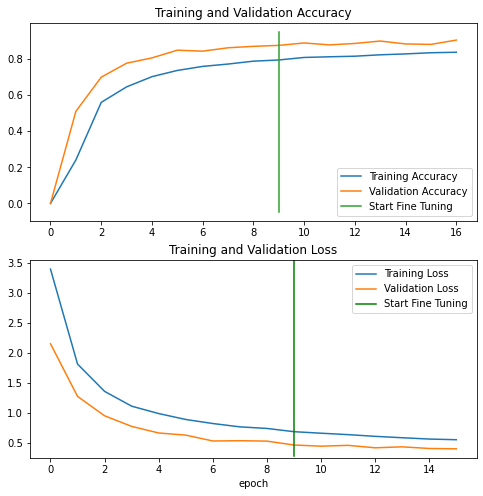

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
# plt.plot([initial_epochs-1,initial_epochs-1],
#          plt.ylim(), label='Start Fine Tuning')
plt.axvline(x = initial_epochs-1,ymin = 0.01, color = "g", label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

